# 一:对象

    在java,c等很多语言中,定义一个变量,必须要指定类型,在python中有点不同,那python怎么知道一个变量(符号)是什么类型呢
        在python中,类型是在运行期中自动决定的,也就是所谓的动态类型模型
        变量只是一个别名,在运行期会替换成为对应的内存地址所指向的具体的值,因为变量永远不会有任何和它关联的类型信息和约束,
        类型的概念是存在于对象中
    
    对象是python中对数据的抽象,表示数据之间的关系,每个对象都有各自的属性(类型和具体值等)
    特点:
        一旦创建，编号不会变(id),即所谓的内存地址  双胞胎问题
        内存:
            sys.getsizeof(123)  python中int是变长的
                struct _longobject {
                PyObject_VAR_HEAD
                digit ob_digit[1];
            };
            python中整型结构中的数组，每个元素最大存储 15 位的二进制数（不同位数操作系统有差异32位系统存15位，64位系统是30位）。

            因此，sys.getsizeof(0) 数组元素为0。此时占用24字节（PyObject_VAR_HEAD 的大小）。
            
            
        销毁问题:
            一旦创建,引用计数不为0 sys.getrefcount(a)  引用计数为0或者只存在对象的弱引用时将回收这个对象
        对于常用字符构成的字符串（0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz）
        Python会采用驻留机制，字符串在内存中只有一份
        CPython 中，id(x) 就是存放 x 的内存的地址
    类型(type):决定了该对象所支持的操作,eg: 比如人又姓名年龄  序列有长度属性等,python中一个对象的类型是不可变的
    eg:
        f = '123456789'
        print(id(f))
        print(type(f))
        f = int(f) 已经是一个新的对象
        print(type(f))
        print(id(f))
        isinstance(1,int)
     
     可变性:
         有些对象的值是可以改变的,值可变的对象被称为可变对象,相反,值不可变的对象就成为不可变对象
         是否可变由其类型决定:数字、字符串和元组是不可变的，而字典和列表是可变的
            延伸:值传递和引用传递
                值传递:被调函数的形式参数作为被调函数的局部变量处理，即在堆栈中开辟了内存空间来存放由主调函数放进来的实参的值,不会影响主调函数的实际参数的值,一个副本而已
                引用传递:被调函数的形式参数虽然也作为局部变量在堆栈中开辟了内存空间,存放的是由主调函数实参变量的地址
                l = [ 1,2,3]
                def demo(l:list):
                    print(id(l),l)
                    l.pop()
                    print(id(l),l)
                demo(l)
                print(id(l),l)
            
            import collections.abc
            print(issubclass(str,collections.abc.Sequence))
            print(issubclass(str,collections.abc.MutableSequence))
            
       变量:
           在运行期可以被修改状态的实体,内存中分配空间,又称符号,在编码时有用,编译器编码完成后,会翻译成一个虚拟地址
           最直接的关联操作就是赋值
               z = 100
               z += 2
           
     

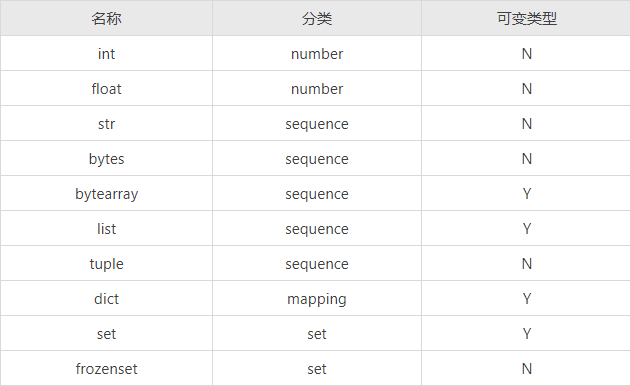

In [46]:
#双胞胎 ?
#import dis
import sys
a = 123456
b = 123456
print(sys.getrefcount(a))
print(id(a),id(b))
print(a is b)
print(a==b)
print(type(a))
print(id(a)==id(b))
c = '1234567'
d = '1234567'
#dis.dis(c)
#dis.dis(d)
print(id(c),id(d))
print(c is d)


3
139948554395216 139948554394800
False
True
<class 'int'>
False
139948916175216 139948916175216
True


In [32]:
a = '1234567'
a = b
print(id(a),id(b))
a is b

139948550361456 139948550361456


True

In [41]:
import collections.abc
print(issubclass(str,collections.abc.Sequence))
print(issubclass(str,collections.abc.MutableSequence))

True
False


In [1]:
l = [ 1,2,3]
def demo(l:list):
    print(id(l),l)
    l.pop()
    print(id(l),l)
demo(l)
print(id(l),l)


140139483274944 [1, 2, 3]
140139483274944 [1, 2]
140139483274944 [1, 2]


# 内存
    对于常用的小数字,解释器会在初始化的时候进行缓存,提高性能,节约内存开销
    以最新版python为例 缓存范围是[-5,256]
   

In [ ]:
a = -5
b = -5
a is b

In [ ]:
#延伸

@profile
def test(s):
    a = s[:]
    b = s[10:-10]
    c = s.split(',')
    return a,b,c

s = '0,' * (1<<20)
test(s)

python3.8 -m memory_profiler testpro.py
Line #    Mem usage    Increment   Line Contents
================================================
     1   38.969 MiB   38.969 MiB   @profile
     2                             def test(s):
     3   38.969 MiB    0.000 MiB       a = s[:]
     4   40.906 MiB    1.938 MiB       b = s[10:-10]
     5   49.840 MiB    8.934 MiB       c = s.split(',')
     6   49.840 MiB    0.000 MiB       return a,b,c
Mem usage : 运行内存大小；
Increment : 运行当前代码后，增加的内存。
    
    
#字符串拼接性能
import string

x = list(string.ascii_uppercase)
print(x)

@profile
def test_add():
    s = ''
    for c in x:
        s += c
    return s



@profile
def test_join():
    return ''.join(x)

test_add()
test_join()

'''
    pip install line_profiler
'''
kernprof -l -v test_str.py  #-l表示逐行分析，-v用于输出
Wrote profile results to test_str.py.lprof
Timer unit: 1e-06 s

Total time: 1.3e-05 s
File: test_str.py
Function: test_add at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     6                                           @profile
     7                                           def test_add():
     8         1          1.0      1.0      7.7      s = ''
     9        27          7.0      0.3     53.8      for c in x:
    10        26          5.0      0.2     38.5          s += c
    11         1          0.0      0.0      0.0      return s

Total time: 1e-06 s
File: test_str.py
Function: test_join at line 15

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    15                                           @profile
    16                                           def test_join():
    17         1          1.0      1.0    100.0      return ''.join(x)

Timer unit: 1e-06 s：时间单位；
Total time: 0.004891 s：总时间；
Hit：代码运行次数；
%Time：代码占了它所在函数的消耗的时间百分比，通常直接看这一列


https://www.cnblogs.com/rgcLOVEyaya/p/RGC_LOVE_YAYA_603days_1.html
guppy

# 标准类型
    numbers.Number(区分整型数、浮点型数和复数):
    序列:
        不可变: str,tuple,字节串(字节串对象是不可变的数组,字节串字面值 (例如 b'abc') 和内置的 bytes() 构造器可被用来创建字节串对象。字节串对象还可以通过 decode() 方法解码为字符串)
        可变:
            列表,字节数组(可以通过内置的 bytearray() 构造器来创建),
    集合类型:
            集合:无序不可重复,不能通过下标访问数据元素
            冻结集合:通过内置的 frozenset() 构造器创建
    映射

In [47]:
a = set()
a.add(1)
a.add(1.0)
a
1==1.0

True

# 导包
    1:导包操作
        import xx
        from xx import xx as x
        先搜索指定名称的模块，然后将搜索结果绑定到当前作用域中的名称。如果找不到则会引发 ModuleNotFoundError。
    2:包
        类比文件系统中的目录,模块可以看做是目录中的文件,通常一个包下面会有一个__init__.py文件
        如果一个模块具有 __path__ 属性，它就是包。
        from mypackage import *
        dir()
        ['__builtins__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'a', 'b', 'c', 'mypackage', 'sys']
        dir(a)
        ['__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']


In [2]:
def add(a):
    y = a +2
    print(locals()) #全部局部变量。
    return y
add(1)

{'a': 1, 'y': 3}


3

In [25]:
import  sys
a = 1234567890
print(a.bit_length()) #获取二进制长度
sys.getsizeof(a)

31


32

In [28]:
a.bit_length()/30*4

4.133333333333334

# 对象复制
    在程序世界中,参数传递有2种方式:值传递和引用传递,值传递的好处其一是在并发状态下，不会引起竞争问题,引用传递节约性能
    复制对象分为浅拷贝和深度拷贝:
        浅拷贝只是复制对象自身,不包括它的引用的其他对象,后者则递归复制所有引用目标
    赋值操作总是存储的是对象的引用,并不是对象的拷贝